In [1]:
import os
import astropy.io.fits as fits
import numpy as np
import scipy
import scipy.ndimage as ndi
import matplotlib.pylab as plt
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pyklip.klip
import pyklip.instruments.Instrument as Instrument
import pyklip.parallelized as parallelized
import pyklip.rdi as rdi
from astropy.nddata.utils import Cutout2D

In [2]:
#Import the dataset to be used
filtername = "f300m"

# read in roll 1
with fits.open("old_simulated_data/NIRCam_target_Roll1_{0}.fits".format(filtername)) as hdulist:
    roll1_cube = hdulist[0].data

# read in roll 2
with fits.open("old_simulated_data/NIRCam_target_Roll2_{0}.fits".format(filtername)) as hdulist:
    roll2_cube = hdulist[0].data  

# combine the two rows
full_seq = np.concatenate([roll1_cube, roll2_cube], axis=0)

# two rolls are offset 10 degrees
pas = np.append([0 for _ in range(roll1_cube.shape[0])], [10 for _ in range(roll2_cube.shape[0])])

# for each image, the (x,y) center where the star is is just the center of the image
centers = np.array([np.array(frame.shape)/2. for frame in full_seq])

# give it some names, just in case we want to refer to them
filenames = np.append(["roll1_{0}".format(i) for i in range(roll1_cube.shape[0])],
                      ["roll2_{0}".format(i) for i in range(roll1_cube.shape[0])])

#Define dataset
dataset = Instrument.GenericData(full_seq, centers, IWA=4, parangs=pas, filenames=filenames)
dataset.flipx = False

In [3]:
image = np.zeros((11,11))
for i in np.arange(0,11):
    for j in np.arange(0,11):
        xcen = 5
        ycen = 5
        image[i,j] = np.sqrt((i-xcen)**2 + (j-ycen)**2)

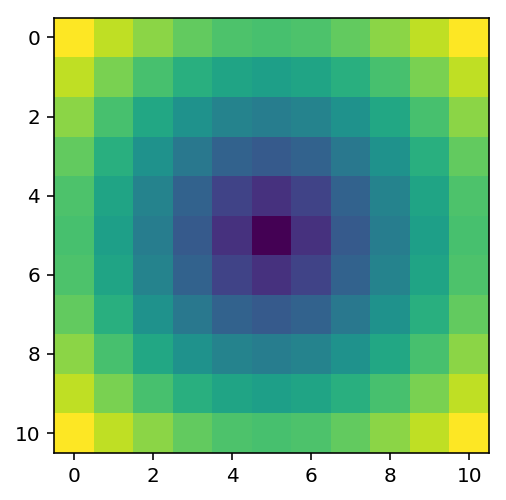

In [4]:
plt.figure()
plt.imshow(image)

In [5]:
stamp = image[7:10,7:10]
input_dx=np.array([2,2,2,3,3,3,4,4,4])
input_dy=np.array([2,3,4,2,3,4,2,3,4])

In [6]:
dist = np.arange(2,5)
trans = np.array([10,100,1000])

In [19]:
def transmission_corrected(input_stamp, input_dx, input_dy, dist, trans):
    for x in input_dx:
        for y in input_dy:
            distance_from_center = np.sqrt((input_dx)**2+(input_dy)**2)
            trans_at_dist = np.interp(distance_from_center, dist, trans)
            output_stamp = np.vstack((distance_from_center, trans_at_dist))
    return output_stamp 

In [20]:
test = transmission_corrected(stamp, input_dx, input_dy, dist, trans)

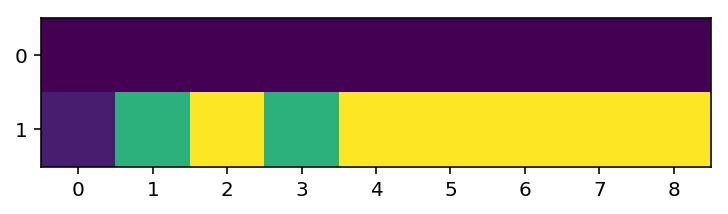

In [9]:
plt.figure()
plt.imshow(test)

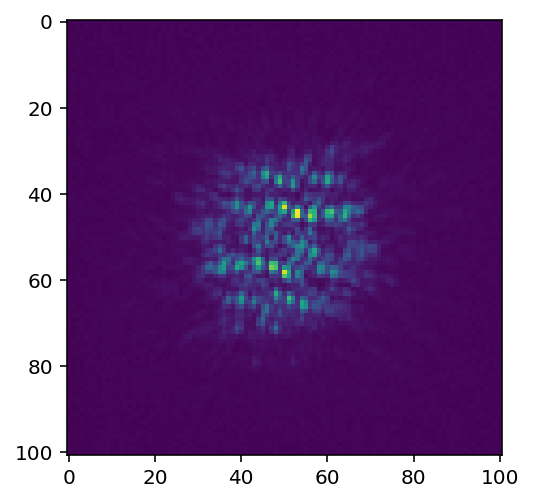

In [10]:
plt.figure()
plt.imshow(roll2_cube[0])

In [11]:
#Make a stamp around 80, 60
stamp1 = roll2_cube[0][79:82,59:62]

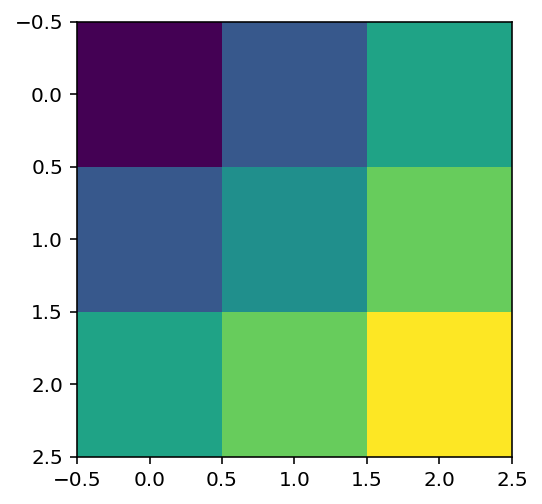

In [12]:
plt.figure()
plt.imshow(stamp)

In [15]:
mask210 = pd.read_csv("MASK210R.csv")

In [17]:
input_dx_stamp = [79,79,79,80,80,80,81,81,81]
input_dy_stamp = [59,60,61,59,60,61,59,60,61]

In [27]:
nircam_test = transmission_corrected(stamp1, 
                                     input_dx_stamp, 
                                     input_dy_stamp, 
                                     np.array(mask210["rad_dist"]),
                                     np.array(mask210["trans"]))

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'